Social Network Ads project aims to predict the person purchased for an add or not. It is a binary classification project and I'm gonna use SVM with Gaussian kernel because we don't have many features it would enhance the model also I'm gonna use standard scaler to scale my values, it is a very important point because we use the Gaussian kernel.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get the data
ads = pd.read_csv('Social_Network_Ads.csv')
ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# user id seems useless also we can convert to gender column to numeric values
ads.drop('User ID', axis=1, inplace=True)
sex_dict = {'Male': 0, "Female": 1} # we can also map this after visualization but I don't plot anything in this project so I prefered to convert in here
ads['Gender'] = ads['Gender'].map(sex_dict)
ads

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [6]:
ads.isna().sum() # no null values

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
ads.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [8]:
ads.shape

(400, 4)

In [9]:
# split the data 
X = ads.drop('Purchased', axis=1)
y = ads['Purchased']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# scale the X_train and X_test

from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_train = sclr.fit_transform(X_train)
X_test = sclr.fit_transform(X_test)

In [27]:
# generate the SVM model with Gaussian kernel
from sklearn.svm import SVC

svm = SVC(kernel="rbf", gamma="scale", C=1)
svm.fit(X_train, y_train)

SVC(C=1)

In [28]:
# make predictions
preds = svm.predict(X_test)
preds

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

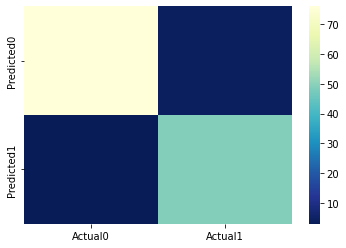

In [29]:
# results of the model

from sklearn import metrics

conmatrix = pd.DataFrame(metrics.confusion_matrix(y_test, preds), columns=['Actual0', 'Actual1'], index=['Predicted0', 'Predicted1'])
sns.heatmap(conmatrix, cmap='YlGnBu_r') # there is no misguess